In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
  'font.size': 12,
  'grid.alpha': 0.25})

## Function declarations

### Read `ods` to `DataFrame`


In [3]:
def read_ods(filename, columns=None):
  if columns is None:
    df = pd.read_excel(filename, engine="odf", header=0)
  else:
    key_arr = (k for k in columns.keys())
    df = pd.read_excel(filename, engine="odf", header=0,
                      usecols=columns)
    df = df.rename(columns=columns)
  return df

## Load the data

In [5]:
filename = "04-table-05-burnham-furniture-sales-data.ods"

df = read_ods(filename)

df


,Year,"Burnham Sales ($1,000s)",Retail Furniture Price Index (2002=100),Retail Appliance Price Index (2002=100)
0,1999,42.1,90.1,94.6
1,2000,47.2,95.4,97.2
2,2001,48.4,97.2,98.4
3,2002,50.6,100.0,100.0
4,2003,55.2,104.5,101.1
5,2004,57.9,108.6,103.2
6,2005,59.8,112.4,104.3
7,2006,60.7,114.0,105.6


## Price index and Deflated Sales

Price index = 0.7 CPI retail furniture + 0.3 CPI appliance 

$$
\textrm{Deflated } y \textrm{ sales} 
  = (\textrm{Sales}) \times \left(\frac{\textrm{CPI}_\textrm{2002}}{\textrm{CPI}_y}\right)
$$

In [6]:
df_complete = df.copy()

df_complete["Price Index (2002=100)"] \
  = 0.7 * df_complete["Retail Furniture Price Index (2002=100)"] \
    + 0.3 * df_complete["Retail Appliance Price Index (2002=100)"]

df_complete["Deflated Sales ($1,000s of 2002)"] \
  = df_complete["Burnham Sales ($1,000s)"] * 100/df_complete["Price Index (2002=100)"]

df_complete

,Year,"Burnham Sales ($1,000s)",Retail Furniture Price Index (2002=100),Retail Appliance Price Index (2002=100),Price Index (2002=100),"Deflated Sales ($1,000s of 2002)"
0,1999,42.1,90.1,94.6,91.45,46.036085
1,2000,47.2,95.4,97.2,95.94,49.197415
2,2001,48.4,97.2,98.4,97.56,49.610496
3,2002,50.6,100.0,100.0,100.00,50.600000
4,2003,55.2,104.5,101.1,103.48,53.343641
5,2004,57.9,108.6,103.2,106.98,54.122266
6,2005,59.8,112.4,104.3,109.97,54.378467
7,2006,60.7,114.0,105.6,111.48,54.449229


## Plot of `Sales` and `Deflated Sales`

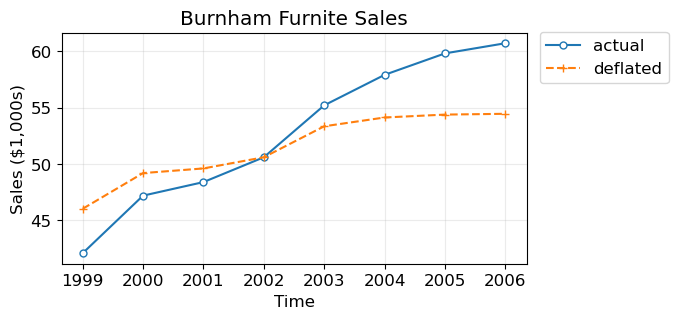

In [11]:
fig, ax = plt.subplots(figsize=(6, 3))

t_period = np.arange(1, len(df_complete)+1)

ax.plot(df_complete["Year"], df_complete["Burnham Sales ($1,000s)"], 
  marker='o', markersize=5, markerfacecolor='white',
  label="actual")

ax.plot(df_complete["Year"], df_complete["Deflated Sales ($1,000s of 2002)"], 
  marker='+', markersize=6, linestyle='--', 
  label="deflated")

ax.set_xlabel("Time")
ax.set_ylabel("Sales ($1,000s)")
ax.set_title("Burnham Furnite Sales")
ax.legend(loc="upper left", bbox_to_anchor=[1.01, 1.04])
ax.grid("on")
plt.show(fig)
